<a href="https://colab.research.google.com/github/HN-UI/25_1_AI_DL/blob/main/practice_file/AI_DL_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load mnist datasets
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 데이터 형식 (개수, size)
train_images.shape

(60000, 28, 28)

In [5]:
# len() -> 배열 길이 return (데이터 개수)
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# train보다 데이터 개수가 적게 할당되어 있음
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

---

In [11]:
# 모델 생성 {512차원 layer 통과 -> relu 활성화 함수 -> 10차우너 layer 통과 -> softmax 활성화 함수}
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    # W_1 * X_i + b_1
    layers.Dense(512, activation = "relu"),
    # W_2 * X_i + b_2
    layers.Dense(10, activation = "softmax")
])

In [13]:
# model의 optimizer, loss function, metrics 설정
model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [14]:
# (60000, 784) 형태의 2D 배열로 변환
train_images = train_images.reshape((60000, 28 * 28))
# 데이터 타입 변환 후, 각 픽셀 값을 0 ~ 1 사이 값으로 정규화
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [15]:
# train data를 활용하여 모델 학습
# epoch과 batch 크기를 설정하여 모델을 학습시킬 수 있음
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8782 - loss: 0.4306
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9660 - loss: 0.1180
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9786 - loss: 0.0718
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9847 - loss: 0.0511
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9885 - loss: 0.0384


In [16]:
test_images.shape

(10000, 784)

In [17]:
# test 데이터 일부 추출
test_digits = test_images[0:10]
# 예측 수행
predictions = model.predict(test_digits)
# 첫 번째 test에 대해 각 class에 대한 확률 값 배열
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([3.52105104e-07, 5.12512415e-08, 6.09609124e-05, 1.09787215e-04,
       1.03802467e-10, 1.65864421e-07, 1.40634254e-10, 9.99820471e-01,
       3.15064267e-06, 5.15875945e-06], dtype=float32)

In [19]:
# 가장 높은 확률이 나온 index
predictions[0].argmax()

7

In [25]:
# 해당 index에 있는 확률 값
predictions[0][7]

0.9998205

In [24]:
# 정답 label은 실제 7이였음
test_labels[0]

7

In [27]:
# evaluate(): test 수행 후 loss 값과 정확도 return
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size = 128)
print(f"test_acc: {test_acc}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9761 - loss: 0.0743
test_acc: 0.9799000024795532


---

In [34]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [35]:
train_images.ndim

3

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
train_images.dtype

dtype('uint8')

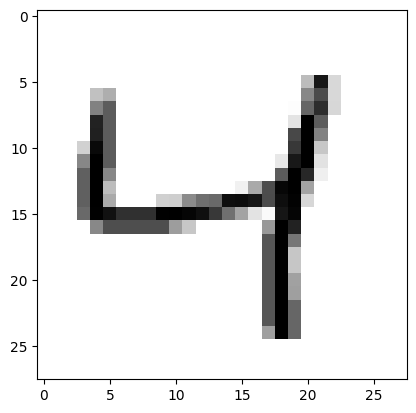

In [39]:
import matplotlib.pyplot as plt
digit = train_images[2]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [41]:
train_labels[2]

4